# Oscar Esau Peralta Rosales
## Procesamiento de Lenguaje Natural
## Tarea 3: Modelos de Lenguaje

## Lectura de los datos

In [1]:
import os
import re

from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []
    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for twitt in f_corpus:
            tr_txt += [twitt]
        for label in f_truth:
            tr_y += [label]
    return tr_txt, np.array(list(map(int, tr_y)))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
tr_txt, tr_y = get_texts_from_file("./mex_test.txt", "./mex_test_labels.txt")

## 1. 

Escriba un programa para calcular conteos de unigramas, y bigramas sin suavizado.

In [0]:
def to_ngrams(sentence, n=2, remove_stopwords=True):
    """ Returns the ngrams for a sentence """
    sentence = sentence.split()
    if remove_stopwords:
        sentence = [word for word in sentence if word not in stopwords.words('spanish')]
    return list(ngrams(sentence, n))

def count_ngrams(datagrams):
    """ Returns a dict with the ngrams frequencies """
    frecs = defaultdict(int)
    for ngrams in datagrams:
        for gram in ngrams:
            frecs[' '.join(gram)] += 1
    return frecs

## 2. 
Corra su programa sobre los dos subconjutos de datos siguientes: (1) Tweets de la clase agresiva, y (2) Tweets de la clase no-agresiva. Compare estadisticas de estos dos subconjuntos. ¿Cuáles son las diferencias entre los unigramas, y bigramas más comunes entre los dos subconjuntos?

In [0]:
# Dividimos los datos en agresivos y no agresivos![texto alternativo](https://)

tr_txt0 = [txt for index, txt in enumerate(tr_txt) if tr_y[index] == 0]
tr_txt1 = [txt for index, txt in enumerate(tr_txt) if tr_y[index] == 1]

In [0]:
# Convertimos cada sentencia en ngrams y realizamos los conteos

tr_bigrams0 = [to_ngrams(tr, n=2, remove_stopwords=True) for tr in tr_txt0]
tr_bigrams1 = [to_ngrams(tr, n=2, remove_stopwords=True) for tr in tr_txt1]

tr_unigrams0 = [to_ngrams(tr, n=1, remove_stopwords=True) for tr in tr_txt0]
tr_unigrams1 = [to_ngrams(tr, n=1, remove_stopwords=True) for tr in tr_txt1]

frecs_bigrams0 = count_ngrams(tr_bigrams0)
frecs_bigrams1 = count_ngrams(tr_bigrams1)

frecs_unigrams0 = count_ngrams(tr_unigrams0)
frecs_unigrams1 = count_ngrams(tr_unigrams1)

In [0]:
# Algunas cosas para graficar

def plot_stats(frecs, top=10, max_words=100, title=''):
    """ Grafica un gráfica de barras con el top y un wordcloud """
    w=10
    h=10
    fig = plt.figure(figsize=(20, 8))
    columns = 2
    rows = 1
    plt.title(title)

    ax1 = fig.add_subplot(rows, columns, 1)
    f_sorted = sorted(frecs.items(), key=lambda item:item[1], reverse=True)
    f_top = f_sorted[:top]
    x, y = zip(*f_top)
    plt.barh(range(top), y)
    plt.yticks(range(top), x)

    ax2 = fig.add_subplot(rows, columns, 2)
    wc = WordCloud(background_color="white", max_words=max_words)
    wc.generate_from_frequencies(frecs)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    plt.show()


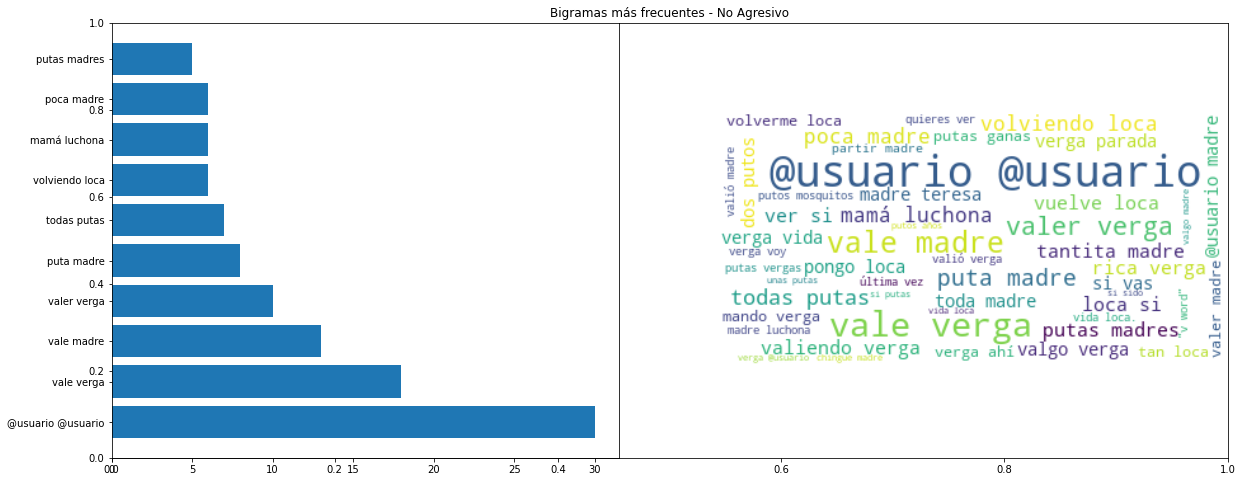

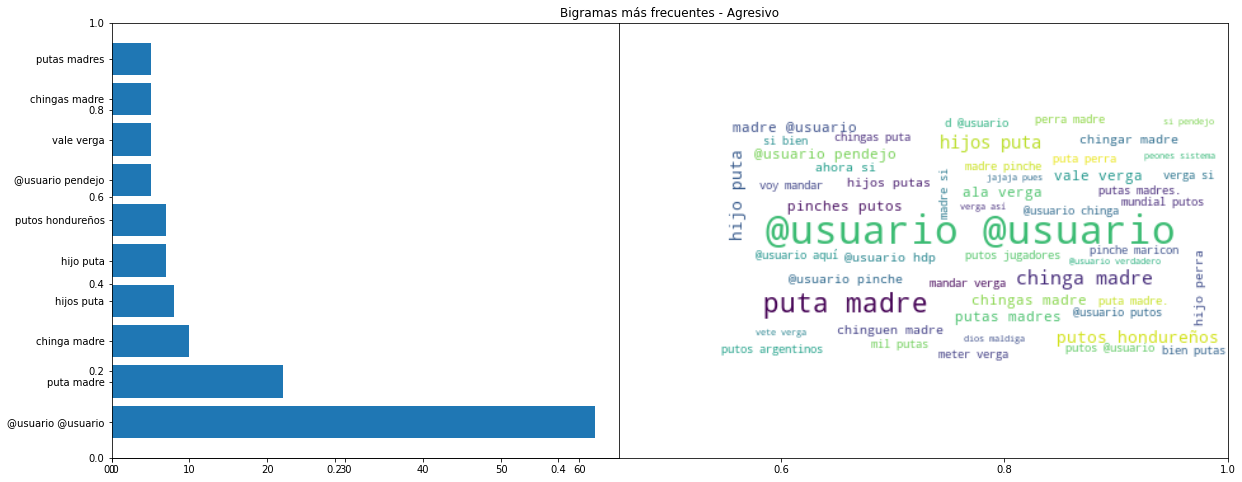

In [33]:
# Gráficas comparativas para bigramas

plot_stats(frecs_bigrams0, top=10, max_words=50, title="Bigramas más frecuentes - No Agresivo")
plot_stats(frecs_bigrams1, top=10, max_words=50, title="Bigramas más frecuentes - Agresivo")

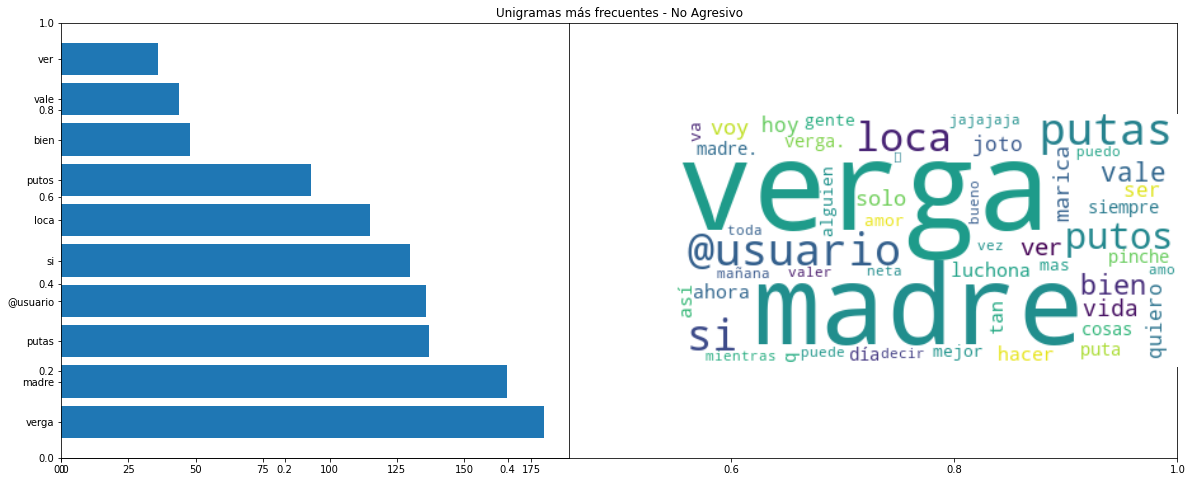

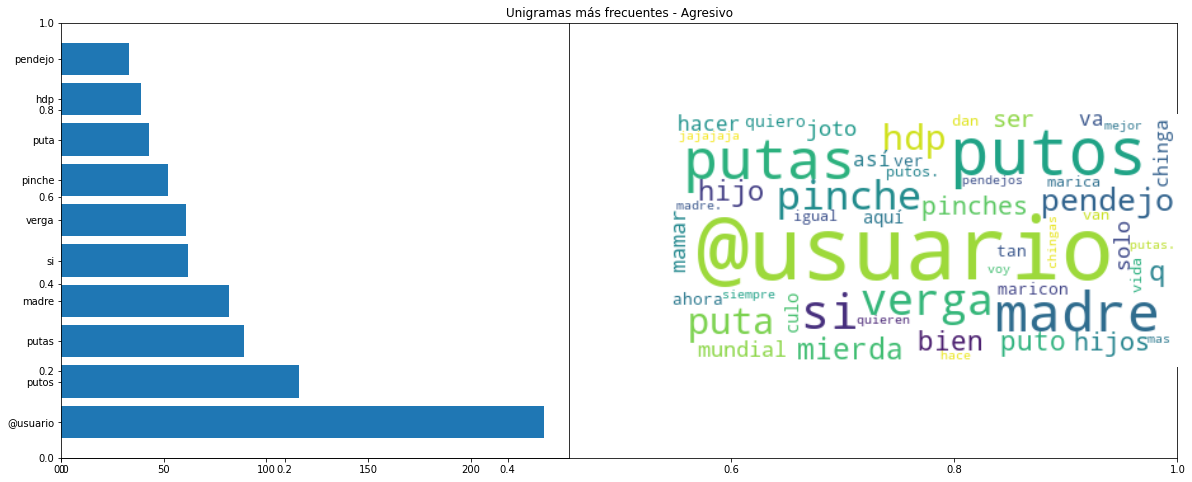

In [34]:
# Gráficas comparativas para Unigramas

plot_stats(frecs_unigrams0, top=10, max_words=50, title="Unigramas más frecuentes - No Agresivo")
plot_stats(frecs_unigrams1, top=10, max_words=50, title="Unigramas más frecuentes - Agresivo")

En los bigramas se observa que se captura mejor la relación entre pequeñas frase formadas de dos palabras por ejemplo "putos hondureños" o "puta madre", en cambio en los unigramas algunas palabras quedan aisladas perdiendo relevacia
por ejemplo "vale" queda un poco lejos de "verga".

## 3. 
Construya las tablas de bigramas y trigramas aplicando Add-one Smoothing tal
como se indica en la "Sección 4.5.1 Laplace Smoothing" del libro de Jurafsky.

In [0]:
tr_bigrams = tr_bigrams0 + tr_bigrams1
frecs_bigrams = {**frecs_bigrams0, **frecs_bigrams1}

tr_unigrams = tr_unigrams0 + tr_unigrams1
frecs_unigrams = {**frecs_unigrams0, **frecs_unigrams1}

In [0]:
def build_table_bigrams(unigrams, frecs_bigrams):
    size = len(unigrams)
    tab = np.ones((size, size))

    for i, (grami, coun) in enumerate(unigrams.items()):
        for j, (gramj, coun) in enumerate(unigrams.items()):
            bigram = ' '.join([gramj, grami])
            if bigram not in frecs_bigrams:
                continue
            tab[i][j] += 1

    return tab

In [0]:
bigrams_count_ build_table_bigrams()